# Breast Cancer Prediction

### Objective: 
    Understand the Dataset & cleanup (if required).                                                                         
    Build classification models to predict whether the cancer type is Malignant or Benign.                                                  
    Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.                       


#### Data Source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


### Metadata:
id: Unique ID                                                                                           
diagnosis: Target: M - Malignant B - Benign                                                                                         
radius_mean: Radius of Lobes                                                                                            
texture_mean: Mean of Surface Texture                                                                                           
perimeter_mean: Outer Perimeter of Lobes                                                                                            
area_mean: Mean Area of Lobes                                                                                           
smoothness_mean: Mean of Smoothness Levels                                                                                          
compactness_mean: Mean of Compactness                                                                                           
concavity_mean: Mean of Concavity                                                                                           
concave points_mean: Mean of Cocave Points                                                                                          
symmetry_mean: Mean of Symmetry                                                                                         
fractal_dimension_mean: Mean of Fractal Dimension                                                                                           
radius_se: SE of Radius                                                                                         
texture_se: SE of Texture                                                                                           
perimeter_se: Perimeter of SE                                                                                           
area_se: Are of SE                                                                                          
smoothness_se: SE of Smoothness                                                                                         
compactness_se: SE of compactness                                                                                           
concavity_se: SEE of concavity                                                                                          
concave points_se: SE of concave points                                                                                         
symmetry_se: SE of symmetry                                                                                         
fractal_dimension_se: SE of Fractal Dimension                                                                                           
radius_worst: Worst Radius                                                                                          
texture_worst: Worst Texture                                                                                            
perimeter_worst: Worst Permimeter                                                                                           
area_worst: Worst Area                                                                                          
smoothness_worst: Worst Smoothness                                                                                          
compactness_worst: Worse Compactness                                                                                            
concavity_worst: Worst Concavity                                                                                            
concave points_worst: Worst Concave Points                                                                                          
symmetry_worst: Worst Symmetry                                                                                          
fractal_dimension_worst: Worst Fractal Dimension



### Necessary Libraries

In [ ]:
#Data Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

#Machine Learning
from sklearn.model_selection import train_test_split
#Evaluation Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



### Data Loading

In [57]:
breast = pd.read_csv('/mnt/d/Self_Study/DEPI/4-ML/datasets/breast-cancer.csv')

### Exploring

In [3]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast.shape
# (569 Rows, 32 Columns)

(569, 32)

In [5]:
breast.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
breast.info()
# Numerical: 31, Categorical: 1
# No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
breast.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
px.histogram(breast, x='diagnosis', title='Diagnosis Distribution', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(breast, x='area_mean', title='Area Mean Distribution', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(breast, x='radius_mean', title='Radius Mean Distribution', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])

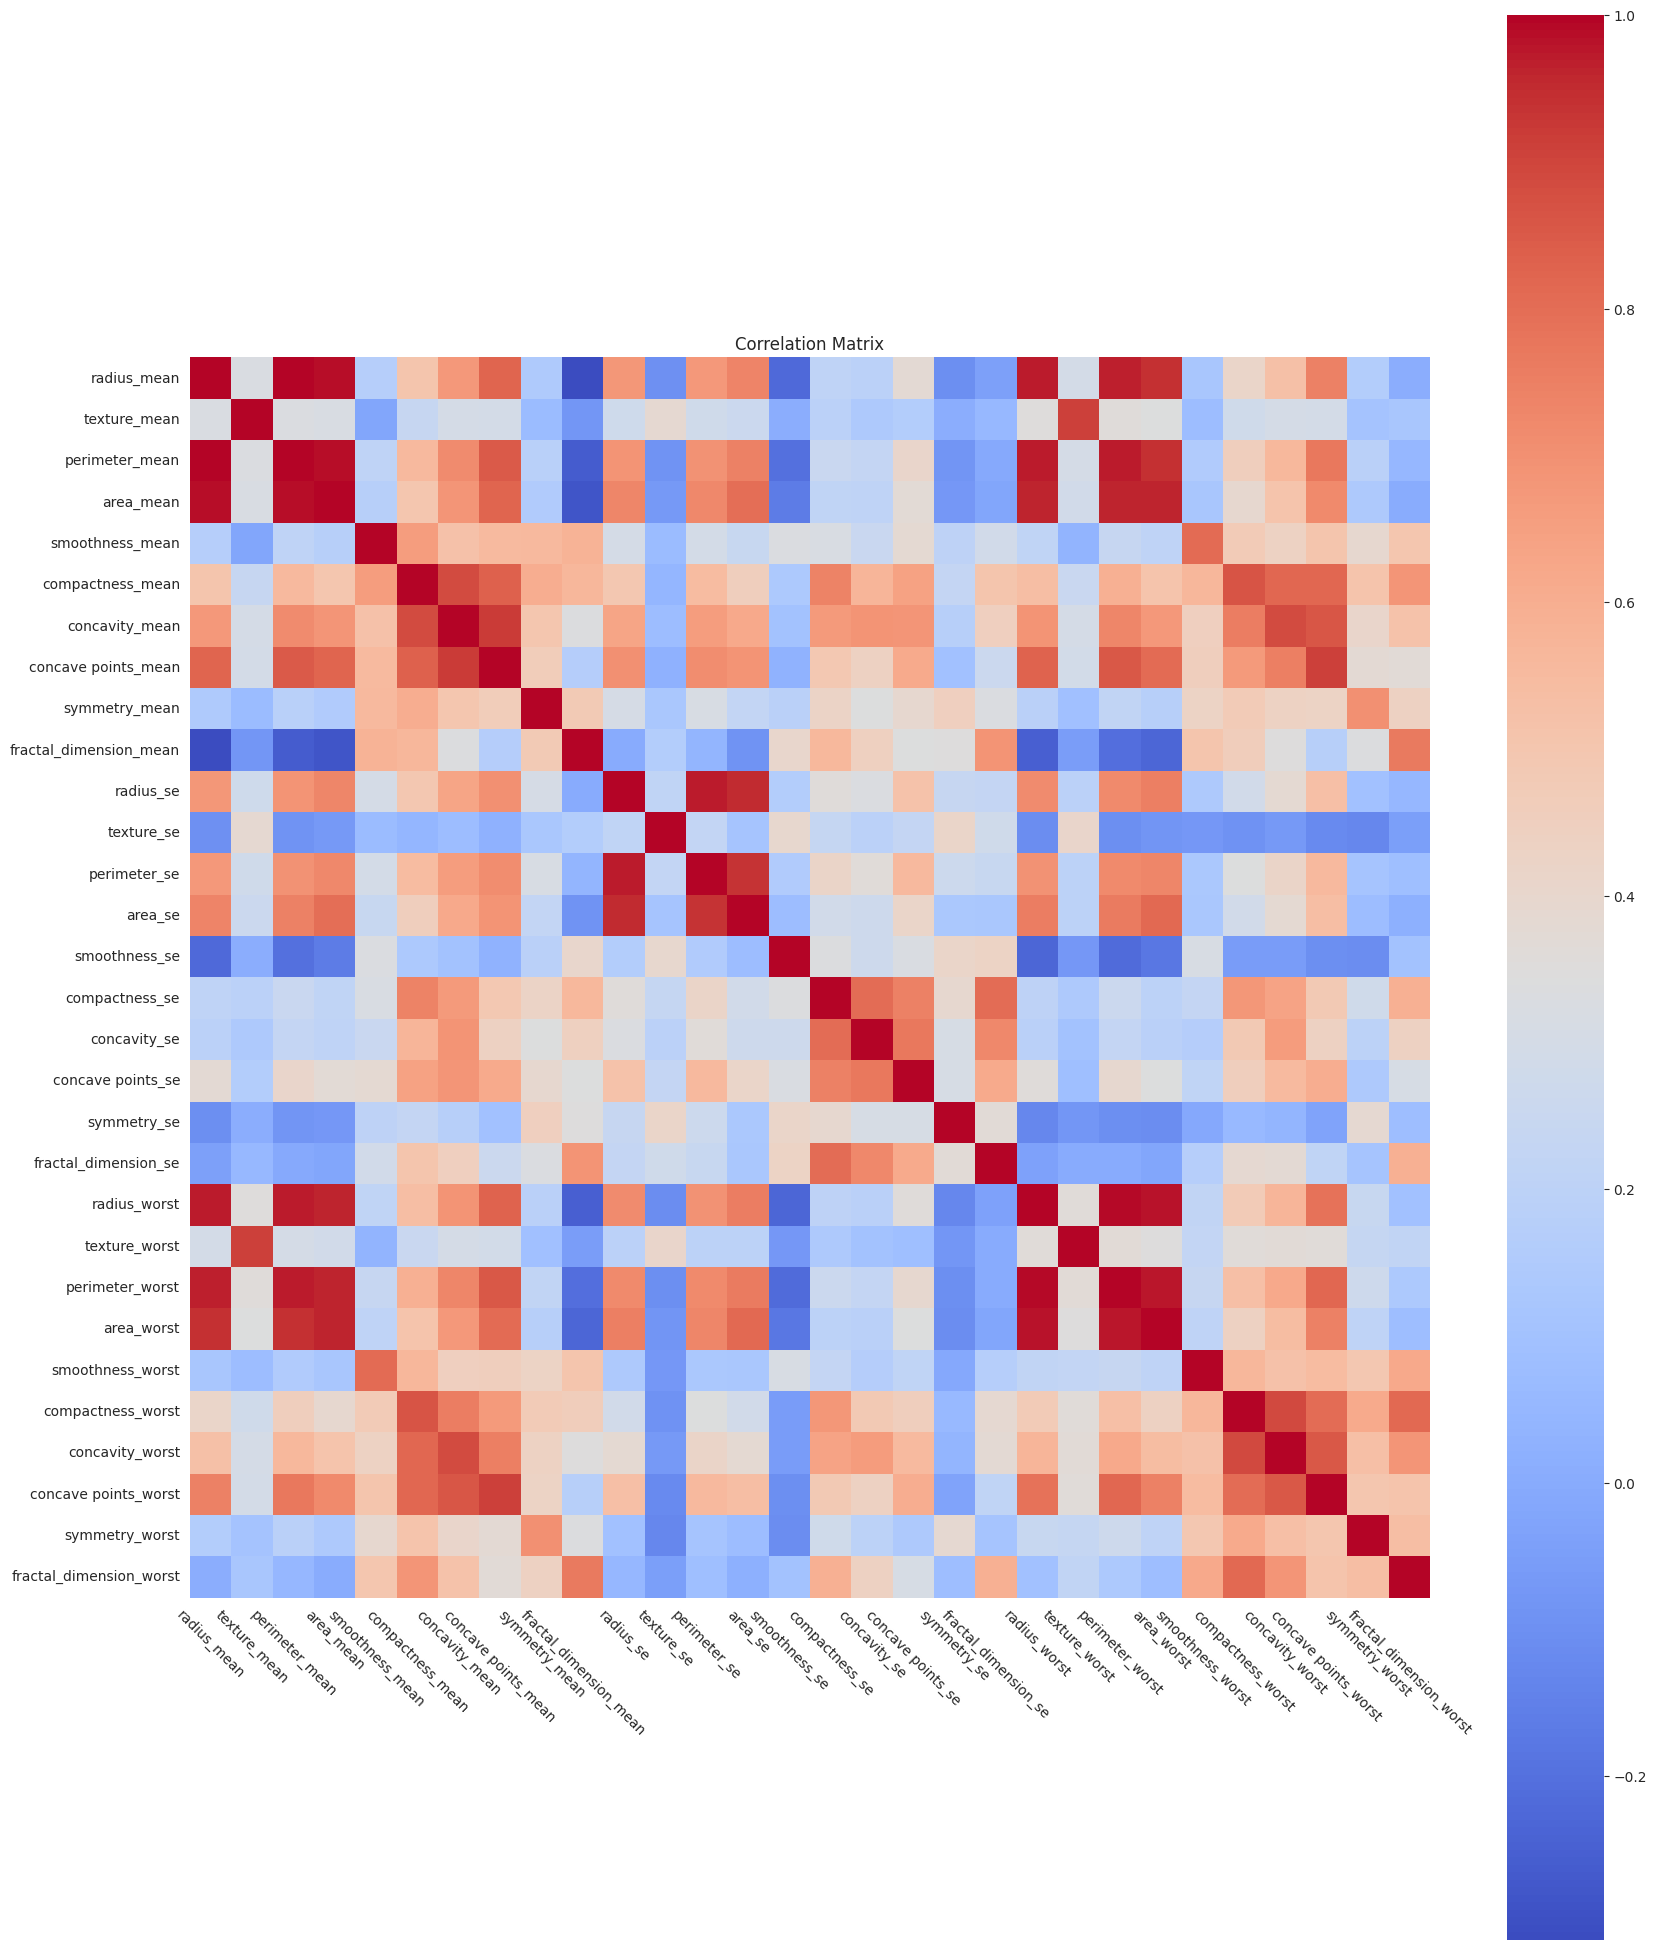

In [20]:
# Correlation Matrix
corr = breast.select_dtypes(include=[np.number]).drop('id', axis=1).corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=-45)
plt.show()

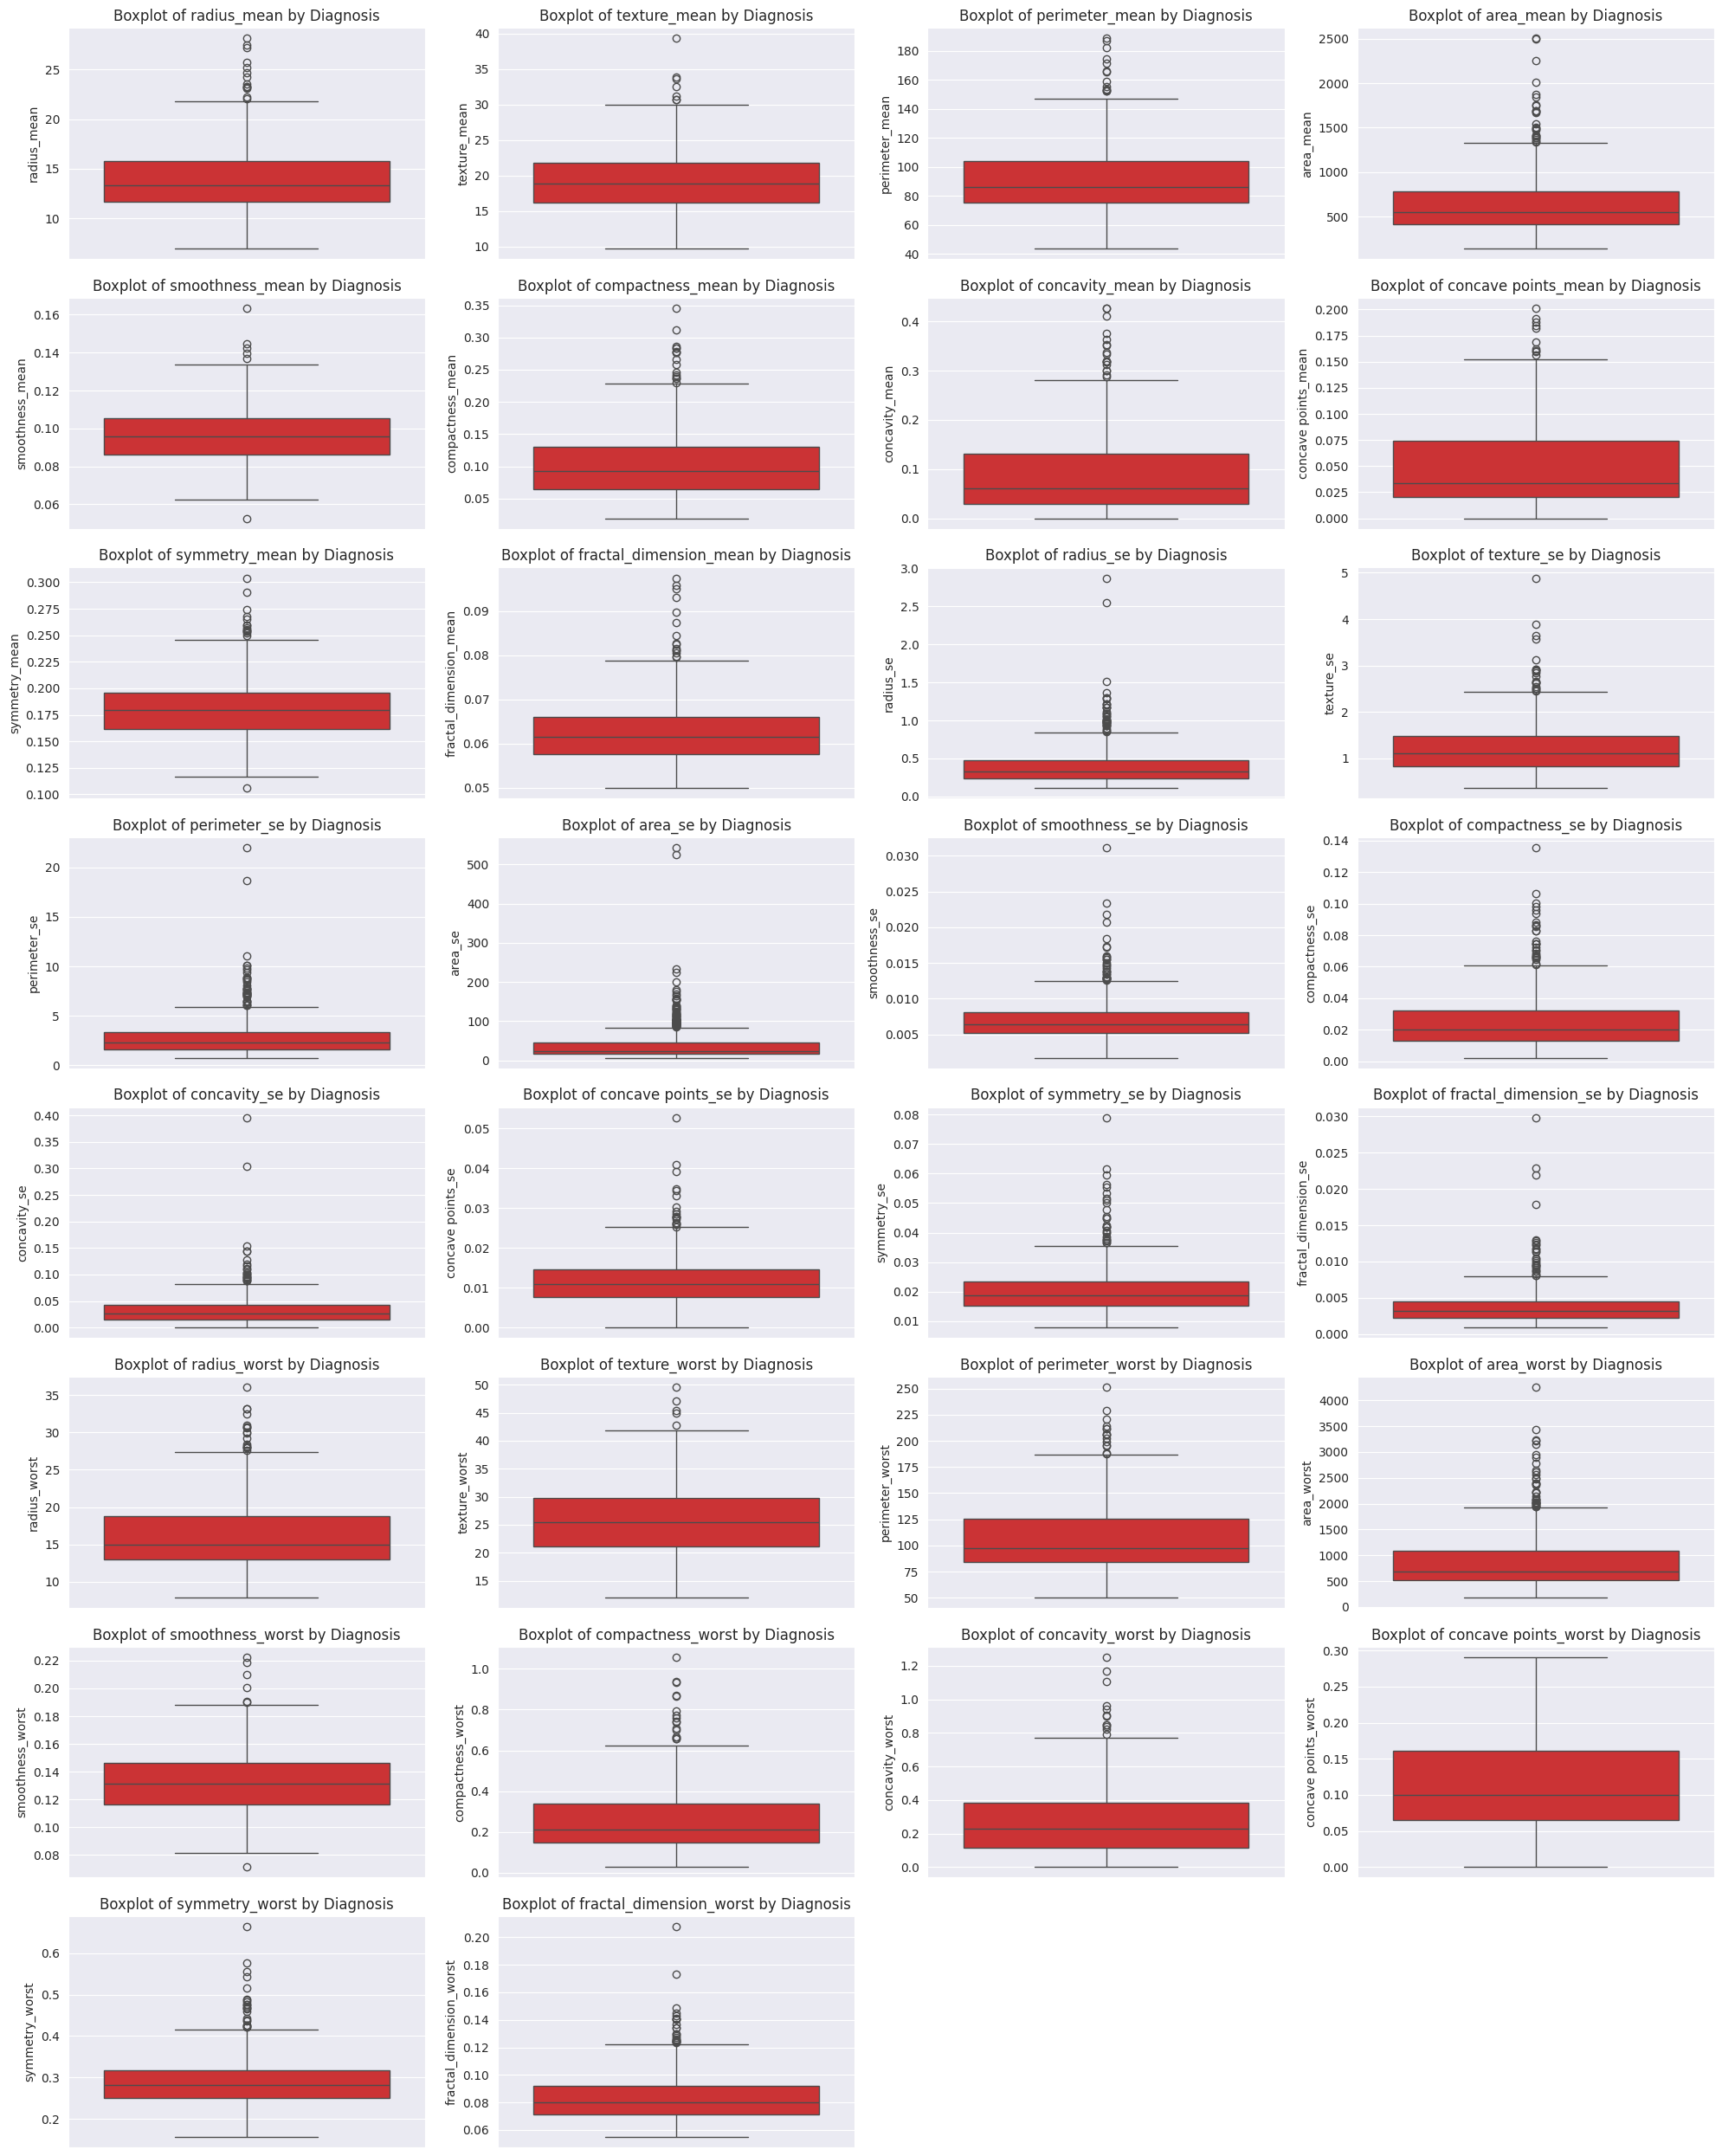

In [39]:
# Visualize boxplots of each feature to see outliers all grouped in on figure
plt.figure(figsize=(20,25))
for i, column in enumerate(breast.select_dtypes(include=[np.number]).drop('id', axis=1).columns, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(data=breast, y=column, palette='Set1')
    plt.title(f'Boxplot of {column} by Diagnosis')
    plt.tight_layout()
plt.show()

### Preprocessing

In [58]:
# Dropping ID column
breast.drop('id', axis=1, inplace=True)

In [59]:
# Encoding the target variable
breast['diagnosis'] = breast['diagnosis'].map({'M':1, 'B':0})
breast['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [60]:
corr = breast.corr()

In [43]:
#correlation matrix by plotly
fig = px.imshow(corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r', title='Correlation Matrix')
fig.update_layout(width=1100, height=800)
fig.show()

In [61]:
# Feature Selection
# Get absolute correlation values with the target variable
target_corr = abs(corr['diagnosis'])

# Select highly correlated features with correlation greater than 0.3 #0.5
selected_features = target_corr[target_corr > 0.3]

In [62]:
print("Selected Features based on correlation with target variable:")
print(selected_features)

Selected Features based on correlation with target variable:
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
concave points_se          0.408042
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
Name: diagnosis, dtype: float64


In [63]:
#collect selected features 
features = selected_features.index.tolist()
features.remove('diagnosis')  # Remove target variable from features list

print("Features to be used for modeling:")
print(features)  # Display the features to be used for modeling

Features to be used for modeling:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [64]:
# splitting the data
X = breast[features]
y = breast['diagnosis']

In [65]:
# Scaling the features
def scale_features(X):
    '''
    standardize the data in the array X
    parameters: X: array-like, shape (n_samples, n_features)
    returns: the standardized feature array
    '''
    #calculate mean and standard deviation for each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [66]:
X = scale_features(X)

In [67]:
def train_test_split_custom(X, y, test_size=0.2, random_state=42):
    '''
    Split the dataset into training and testing sets.
    
    Parameters:
    X: array-like, shape (n_samples, n_features)
        Feature dataset.
    y: array-like, shape (n_samples,)
        Target variable.
    test_size: float, optional (default=0.2)
        Proportion of the dataset to include in the test split.
    random_state: int, optional (default=None)
        Random seed for reproducibility.
        
    Returns:
    X_train, X_test, y_train, y_test: arrays
        Split datasets.
    '''
    #Get number of samples
    n_samples = X.shape[0]

    #Set random seed if provided
    np.random.seed(random_state)

    #shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))


    #Calculate the number of test samples
    test_size = int(n_samples * test_size)

    #Split the indices into training and testing sets
    test_indices = shuffled_indices[:test_size]  
    train_indices = shuffled_indices[test_size:]

    #Split the data into training and testing sets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [68]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,2.833031,2.487578,0.660820,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,0.263327,0.742402,0.260162,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,0.850928,1.181336,1.424827,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,0.286593,-0.288378,1.115007,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,1.273189,1.190357,1.144205,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,2.782080,2.379583,2.604187,2.067178,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,1.300499,1.156857,1.291565,0.808431,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,0.184892,0.276693,0.180698,0.612157,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.157935,1.438530,1.009503,0.785721,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [121]:
# Convert X to numpy array for the custom function to work properly
X_array = X.values
y_array = y.values

# Use the custom train_test_split function
x_train, x_test, y_train, y_test = train_test_split_custom(X_array, y_array, test_size=0.2, random_state=42)



### Model Selection & Training

In [122]:
# SVM
model = SVC()
model.fit(x_train, y_train)
svm_y_pred = model.predict(x_test)

In [123]:
# Apply logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg_y_pred = log_reg.predict(x_test)


In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
knn_y_pred = knn_model.predict(x_test)

In [154]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_y_pred= dt_model.predict(x_test)

### Evaluation

In [124]:
def accuracy(y_true, y_pred):
    '''
    Calculate the accuracy of predictions.
    
    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
        
    Returns:
    accuracy: float
        Accuracy of the predictions.
    '''
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [125]:
accuracy_score = accuracy(y_test, svm_y_pred)
print(f'SVM Accuracy: {accuracy_score:.3f}')

SVM Accuracy: 0.973


In [126]:
log_reg_accuracy = accuracy(y_test,log_reg_y_pred)
print(f'Logistic Regression Accuracy: {log_reg_accuracy:.4f}')

Logistic Regression Accuracy: 0.9823


In [135]:
knn_accuracy = accuracy(y_test,knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9646


In [155]:
dt_accuracy = accuracy(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

Decision Tree Accuracy: 0.9115


### --------------------------------------------------------------------------------------------

In [119]:
# Use the renamed import
svm_report = classification_report(y_test, svm_y_pred, target_names=['Benign', 'Malignant'],digits=4)
print(f"SVC Classification Report:")
print(svm_report)

SVC Classification Report:
              precision    recall  f1-score   support

      Benign     0.9722    0.9859    0.9790        71
   Malignant     0.9756    0.9524    0.9639        42

    accuracy                         0.9735       113
   macro avg     0.9739    0.9691    0.9714       113
weighted avg     0.9735    0.9735    0.9734       113



In [120]:
# Using the renamed import from above
log_reg_clsf_rprt = classification_report(y_test, log_reg_y_pred, target_names=['Benign', 'Malignant'],digits=4)
print("Logistic Regression Classification Report:")
print(log_reg_clsf_rprt)  # Remove the :.4f formatting which is causing an error

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Benign     0.9726    1.0000    0.9861        71
   Malignant     1.0000    0.9524    0.9756        42

    accuracy                         0.9823       113
   macro avg     0.9863    0.9762    0.9809       113
weighted avg     0.9828    0.9823    0.9822       113



In [140]:
knn_clsf_rprt = classification_report(y_test,knn_y_pred,target_names=['Benign', 'Malignant'],digits=4 )
print("KNN Classification report: \n")
print(knn_clsf_rprt)

KNN Classification report: 

              precision    recall  f1-score   support

      Benign     0.9718    0.9718    0.9718        71
   Malignant     0.9524    0.9524    0.9524        42

    accuracy                         0.9646       113
   macro avg     0.9621    0.9621    0.9621       113
weighted avg     0.9646    0.9646    0.9646       113



In [156]:
dt_clsf_rprt = classification_report(y_test,dt_y_pred,target_names=['Benign', 'Malignant'],digits=4 )
print("Decision Tree Classification report: \n")
print(dt_clsf_rprt)

Decision Tree Classification report: 

              precision    recall  f1-score   support

      Benign     0.9420    0.9155    0.9286        71
   Malignant     0.8636    0.9048    0.8837        42

    accuracy                         0.9115       113
   macro avg     0.9028    0.9101    0.9061       113
weighted avg     0.9129    0.9115    0.9119       113



### --------------------------------------------------------------------------------------------

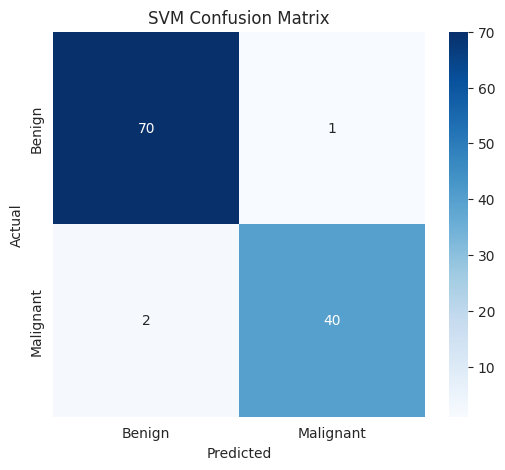

In [131]:
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()

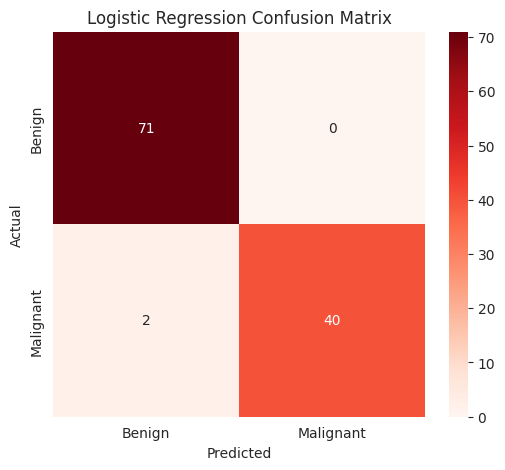

In [132]:
# Confusion matrix of Logistic regression
log_reg_conf_mtrx = confusion_matrix(y_test,log_reg_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(log_reg_conf_mtrx, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

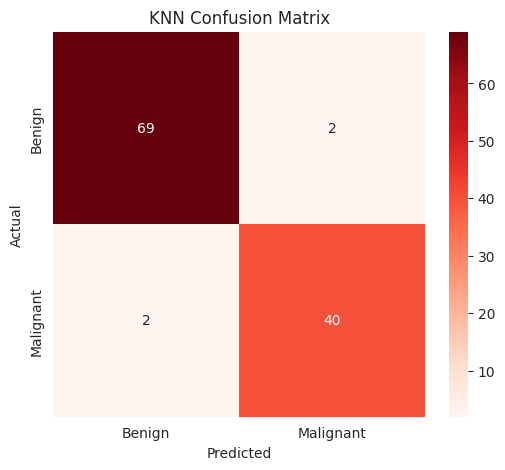

In [141]:
# KNN Confusion matrix
knn_conf_mtrx = confusion_matrix(y_test,knn_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(knn_conf_mtrx, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Confusion Matrix')
plt.show()

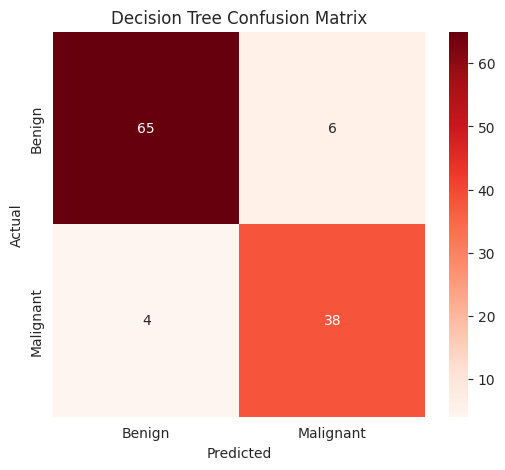

In [157]:
# Decision Tree Confusion matrix
dt_conf_mtrx = confusion_matrix(y_test,dt_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(dt_conf_mtrx, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### --------------------------------------------------------------------------------------------

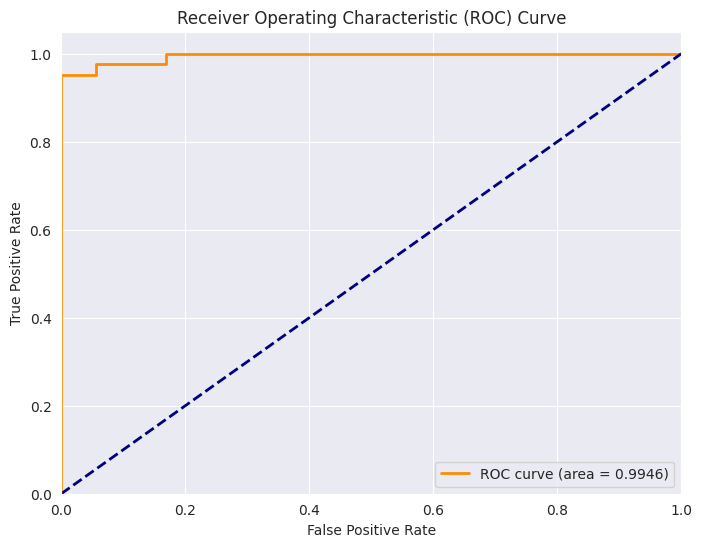

In [145]:
# Roc Curve and AUC
svm_y_prob = model.decision_function(x_test) 
fpr, tpr, thresholds = roc_curve(y_test, svm_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

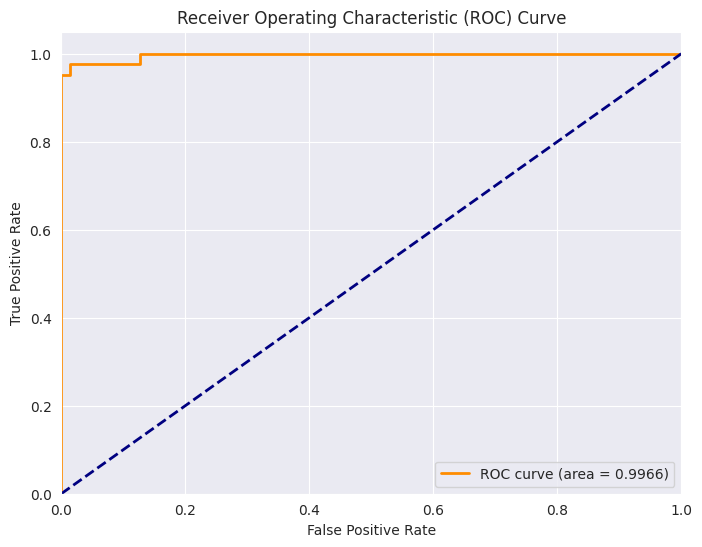

In [146]:
# Roc Curve and AUC
log_reg_y_prob = log_reg.decision_function(x_test) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

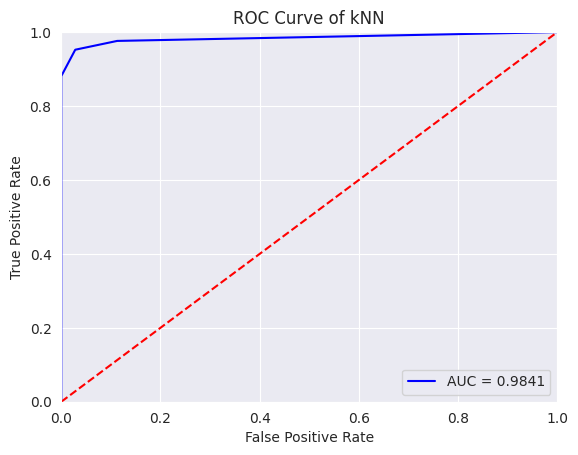

In [152]:
y_scores = knn_model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

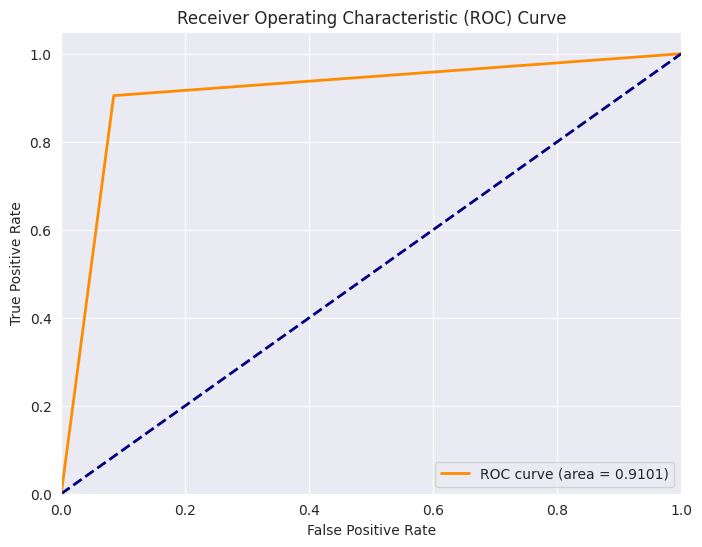

In [158]:
dt_y_prob = dt_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()